#***BNB***

#8:2

MAE: 376.3104753785238
RMSE: 397.537730100552
MAPE: 1.4264916513332402
Predictions for the next 30 days: [737.33616012 737.4299811  737.57071257 737.71144405 737.85217552
 737.99290699 738.13363846 738.27436993 738.4151014  738.55583287
 738.69656435 738.83729582 738.97802729 739.11875876 739.25949023
 739.4002217  739.54095317 739.68168465 739.82241612 739.96314759
 740.10387906 740.24461053 740.385342   740.52607347 740.66680495
 740.80753642 740.94826789 741.08899936 741.22973083 741.32355181]
Predictions for the next 60 days: [737.33616012 737.4299811  737.57071257 737.71144405 737.85217552
 737.99290699 738.13363846 738.27436993 738.4151014  738.55583287
 738.69656435 738.83729582 738.97802729 739.11875876 739.25949023
 739.4002217  739.54095317 739.68168465 739.82241612 739.96314759
 740.10387906 740.24461053 740.385342   740.52607347 740.66680495
 740.80753642 740.94826789 741.08899936 741.22973083 741.3704623
 741.51119378 741.65192525 741.79265672 741.93338819 742.07411966
 74

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

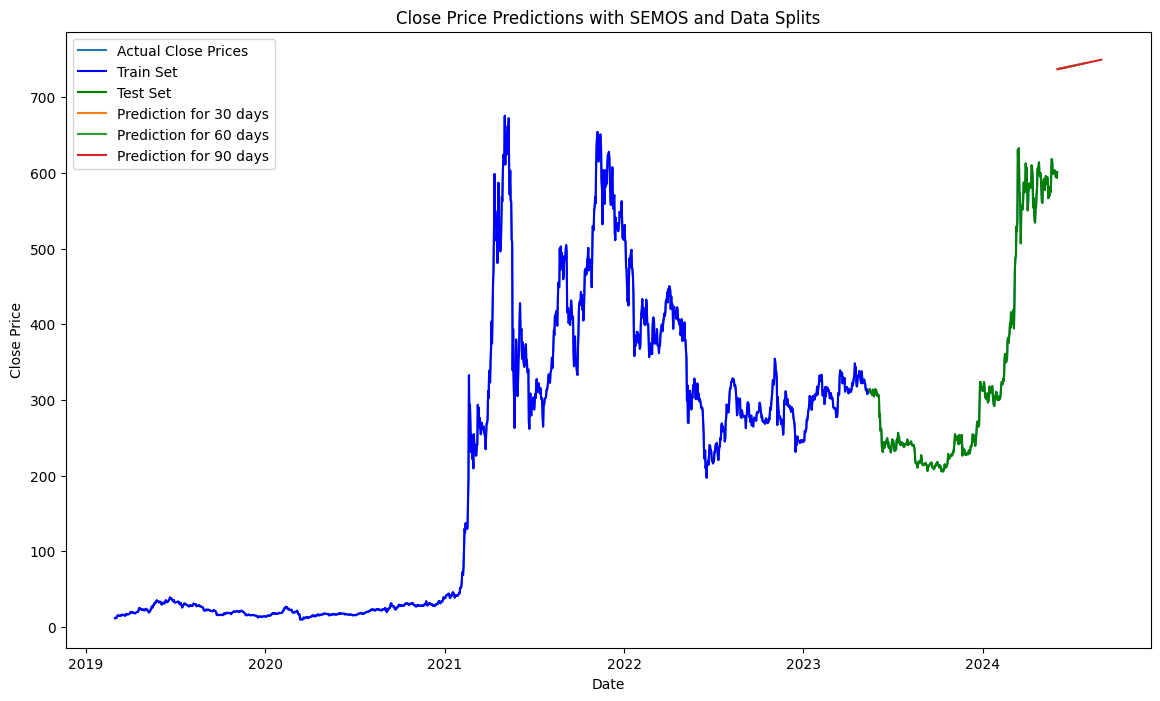

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Bnb.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#7:3

MAE: 409.0190055975251
RMSE: 422.44606666216214
MAPE: 1.487021475321896
Predictions for the next 30 days: [771.90211435 771.99509018 772.13455392 772.27401766 772.4134814
 772.55294514 772.69240887 772.83187261 772.97133635 773.11080009
 773.25026383 773.38972757 773.52919131 773.66865505 773.80811879
 773.94758253 774.08704627 774.22651001 774.36597375 774.50543749
 774.64490123 774.78436497 774.92382871 775.06329245 775.20275619
 775.34221993 775.48168367 775.62114741 775.76061115 775.85358698]
Predictions for the next 60 days: [771.90211435 771.99509018 772.13455392 772.27401766 772.4134814
 772.55294514 772.69240887 772.83187261 772.97133635 773.11080009
 773.25026383 773.38972757 773.52919131 773.66865505 773.80811879
 773.94758253 774.08704627 774.22651001 774.36597375 774.50543749
 774.64490123 774.78436497 774.92382871 775.06329245 775.20275619
 775.34221993 775.48168367 775.62114741 775.76061115 775.90007489
 776.03953863 776.17900237 776.31846611 776.45792985 776.59739359
 77

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

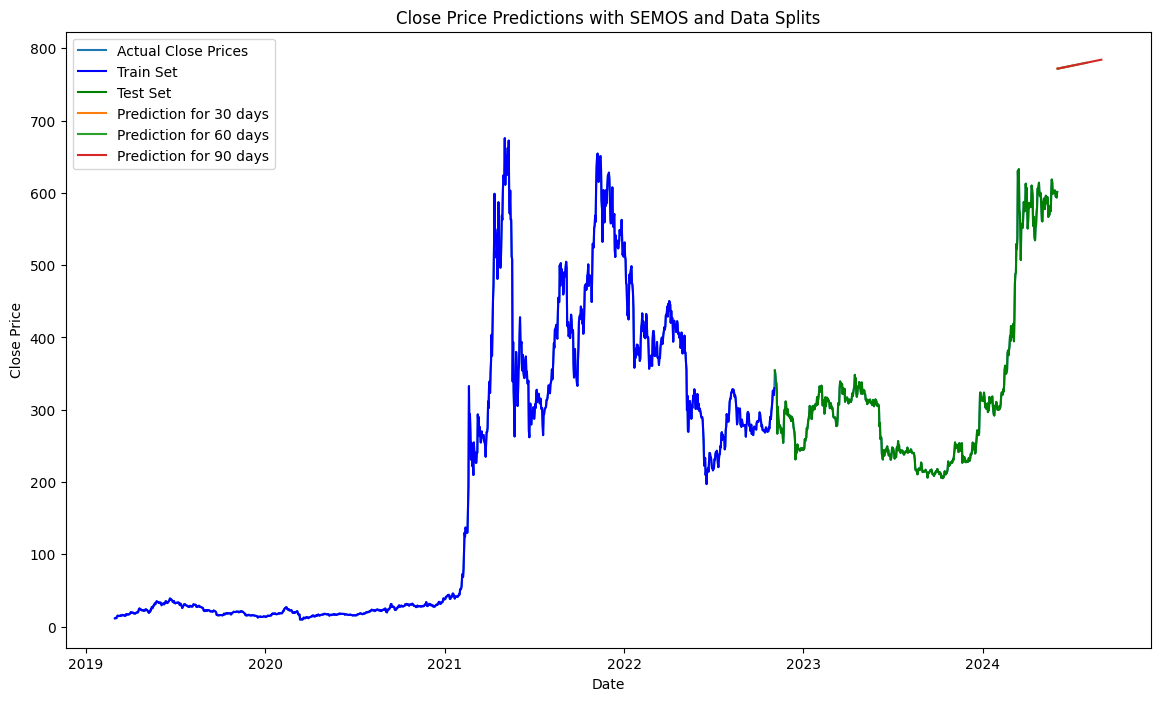

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Bnb.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 7:3 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#6:4

MAE: 607.8361831945418
RMSE: 614.8533493054014
MAPE: 2.1678411204637063
Predictions for the next 30 days: [1004.57121517 1004.7160129  1004.9332095  1005.1504061  1005.3676027
 1005.5847993  1005.8019959  1006.01919249 1006.23638909 1006.45358569
 1006.67078229 1006.88797889 1007.10517549 1007.32237209 1007.53956869
 1007.75676528 1007.97396188 1008.19115848 1008.40835508 1008.62555168
 1008.84274828 1009.05994488 1009.27714147 1009.49433807 1009.71153467
 1009.92873127 1010.14592787 1010.36312447 1010.58032107 1010.7251188 ]
Predictions for the next 60 days: [1004.57121517 1004.7160129  1004.9332095  1005.1504061  1005.3676027
 1005.5847993  1005.8019959  1006.01919249 1006.23638909 1006.45358569
 1006.67078229 1006.88797889 1007.10517549 1007.32237209 1007.53956869
 1007.75676528 1007.97396188 1008.19115848 1008.40835508 1008.62555168
 1008.84274828 1009.05994488 1009.27714147 1009.49433807 1009.71153467
 1009.92873127 1010.14592787 1010.36312447 1010.58032107 1010.79751767
 1011.014

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

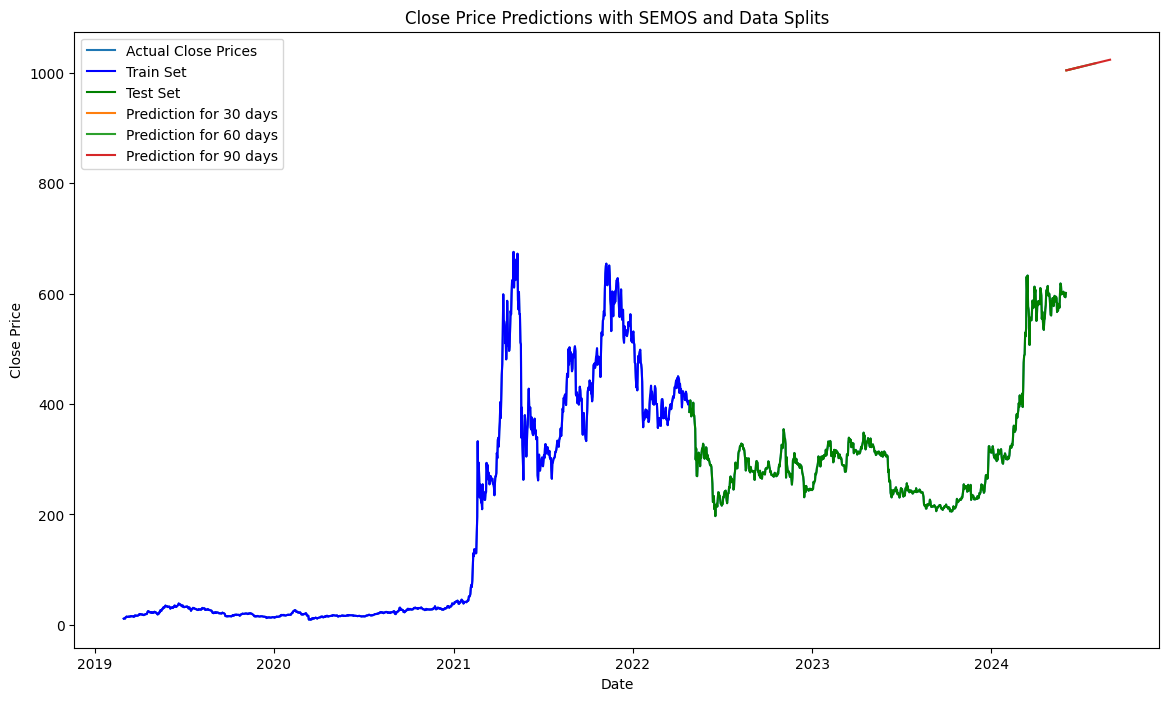

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Bnb.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 6:4 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#***BTC***

#8:2

MAE: 23042.76161159641
RMSE: 26502.89935374016
MAPE: 0.7302284548793937
Predictions for the next 30 days: [66799.90660565 66808.17791637 66820.58488246 66832.99184855
 66845.39881464 66857.80578073 66870.21274682 66882.61971291
 66895.026679   66907.43364509 66919.84061118 66932.24757727
 66944.65454336 66957.06150945 66969.46847553 66981.87544162
 66994.28240771 67006.6893738  67019.09633989 67031.50330598
 67043.91027207 67056.31723816 67068.72420425 67081.13117034
 67093.53813643 67105.94510252 67118.35206861 67130.7590347
 67143.16600079 67151.43731151]
Predictions for the next 60 days: [66799.90660565 66808.17791637 66820.58488246 66832.99184855
 66845.39881464 66857.80578073 66870.21274682 66882.61971291
 66895.026679   66907.43364509 66919.84061118 66932.24757727
 66944.65454336 66957.06150945 66969.46847553 66981.87544162
 66994.28240771 67006.6893738  67019.09633989 67031.50330598
 67043.91027207 67056.31723816 67068.72420425 67081.13117034
 67093.53813643 67105.94510252 67118

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

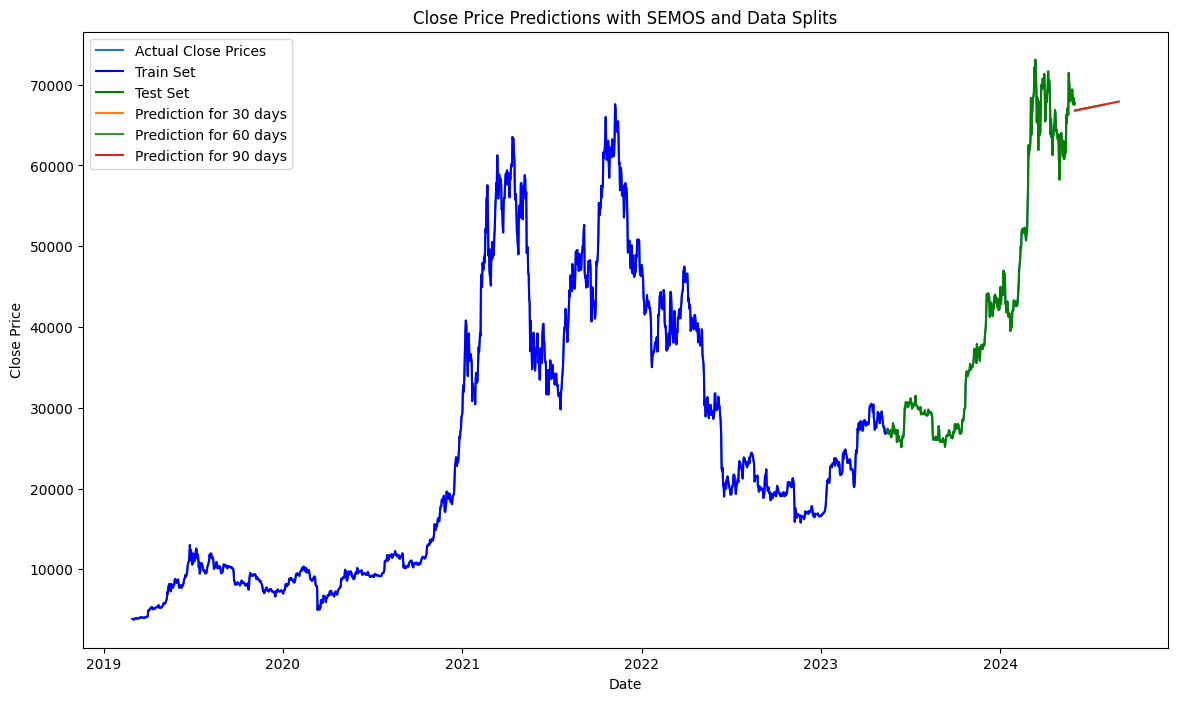

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Btc.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#7:3

MAE: 23225.52772215454
RMSE: 25350.55804512245
MAPE: 0.9001226331566854
Predictions for the next 30 days: [61060.41627794 61070.21139952 61084.9040819  61099.59676427
 61114.28944665 61128.98212902 61143.6748114  61158.36749377
 61173.06017615 61187.75285852 61202.44554089 61217.13822327
 61231.83090564 61246.52358802 61261.21627039 61275.90895277
 61290.60163514 61305.29431752 61319.98699989 61334.67968227
 61349.37236464 61364.06504701 61378.75772939 61393.45041176
 61408.14309414 61422.83577651 61437.52845889 61452.22114126
 61466.91382364 61476.70894522]
Predictions for the next 60 days: [61060.41627794 61070.21139952 61084.9040819  61099.59676427
 61114.28944665 61128.98212902 61143.6748114  61158.36749377
 61173.06017615 61187.75285852 61202.44554089 61217.13822327
 61231.83090564 61246.52358802 61261.21627039 61275.90895277
 61290.60163514 61305.29431752 61319.98699989 61334.67968227
 61349.37236464 61364.06504701 61378.75772939 61393.45041176
 61408.14309414 61422.83577651 6143

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

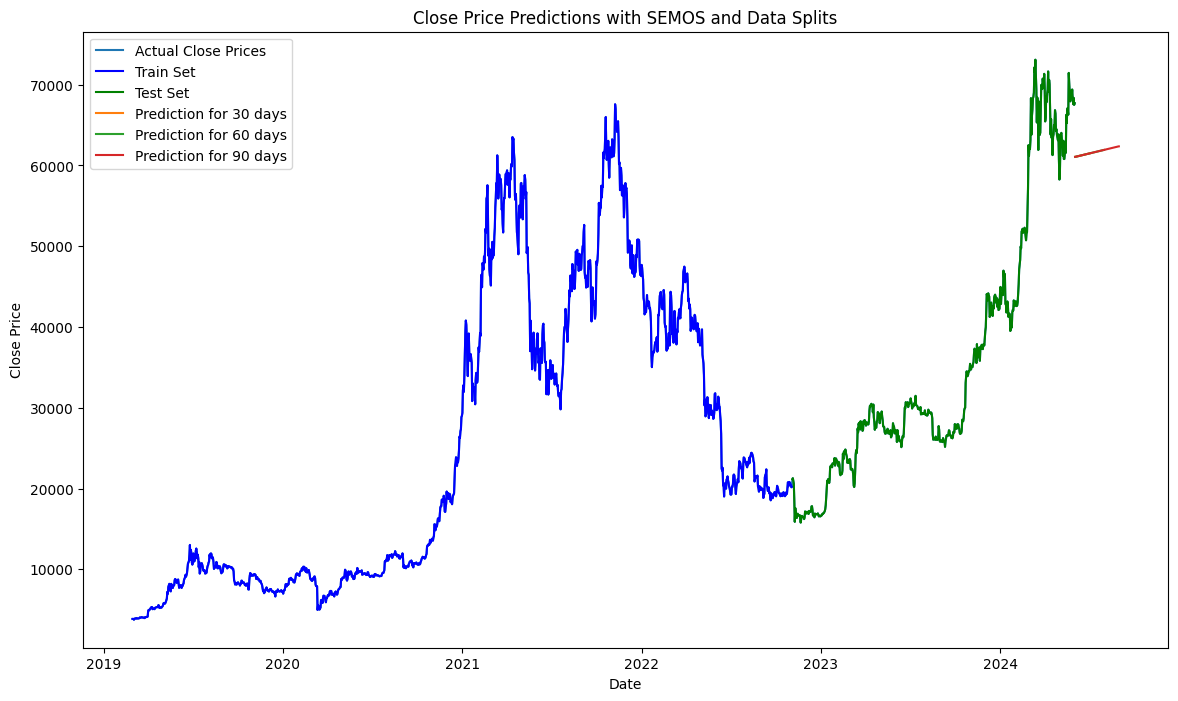

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Btc.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 7:3 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#6:4

MAE: 61786.76911547858
RMSE: 62880.36851665724
MAPE: 2.361556045169546
Predictions for the next 30 days: [102522.88275106 102537.05473834 102558.31271926 102579.57070018
 102600.82868111 102622.08666203 102643.34464295 102664.60262387
 102685.8606048  102707.11858572 102728.37656664 102749.63454756
 102770.89252849 102792.15050941 102813.40849033 102834.66647125
 102855.92445218 102877.1824331  102898.44041402 102919.69839494
 102940.95637587 102962.21435679 102983.47233771 103004.73031863
 103025.98829956 103047.24628048 103068.5042614  103089.76224232
 103111.02022325 103125.19221053]
Predictions for the next 60 days: [102522.88275106 102537.05473834 102558.31271926 102579.57070018
 102600.82868111 102622.08666203 102643.34464295 102664.60262387
 102685.8606048  102707.11858572 102728.37656664 102749.63454756
 102770.89252849 102792.15050941 102813.40849033 102834.66647125
 102855.92445218 102877.1824331  102898.44041402 102919.69839494
 102940.95637587 102962.21435679 102983.4723377

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

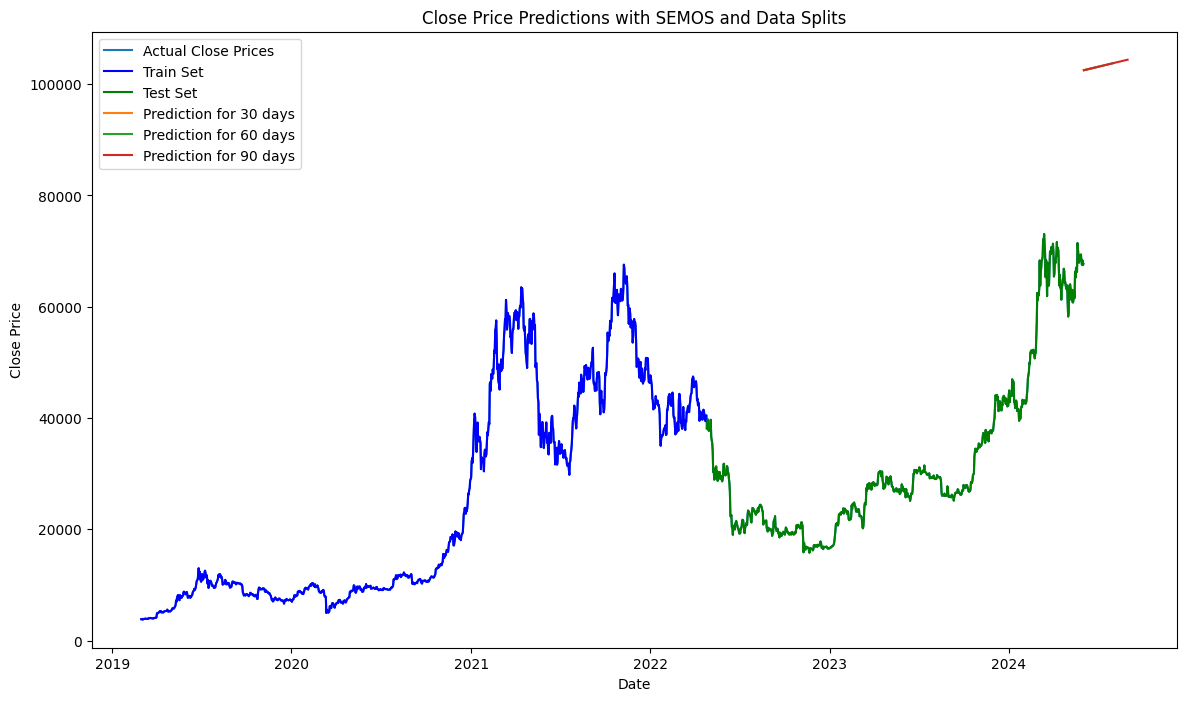

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Btc.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 6:4 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#***ETH***

#8:2

MAE: 1904.825623512185
RMSE: 2002.679369905117
MAPE: 0.9502414216480753
Predictions for the next 30 days: [4410.1263346  4410.70014068 4411.56084979 4412.4215589  4413.28226802
 4414.14297713 4415.00368625 4415.86439536 4416.72510447 4417.58581359
 4418.4465227  4419.30723182 4420.16794093 4421.02865005 4421.88935916
 4422.75006827 4423.61077739 4424.4714865  4425.33219562 4426.19290473
 4427.05361384 4427.91432296 4428.77503207 4429.63574119 4430.4964503
 4431.35715941 4432.21786853 4433.07857764 4433.93928676 4434.51309283]
Predictions for the next 60 days: [4410.1263346  4410.70014068 4411.56084979 4412.4215589  4413.28226802
 4414.14297713 4415.00368625 4415.86439536 4416.72510447 4417.58581359
 4418.4465227  4419.30723182 4420.16794093 4421.02865005 4421.88935916
 4422.75006827 4423.61077739 4424.4714865  4425.33219562 4426.19290473
 4427.05361384 4427.91432296 4428.77503207 4429.63574119 4430.4964503
 4431.35715941 4432.21786853 4433.07857764 4433.93928676 4434.79999587
 4435.660

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

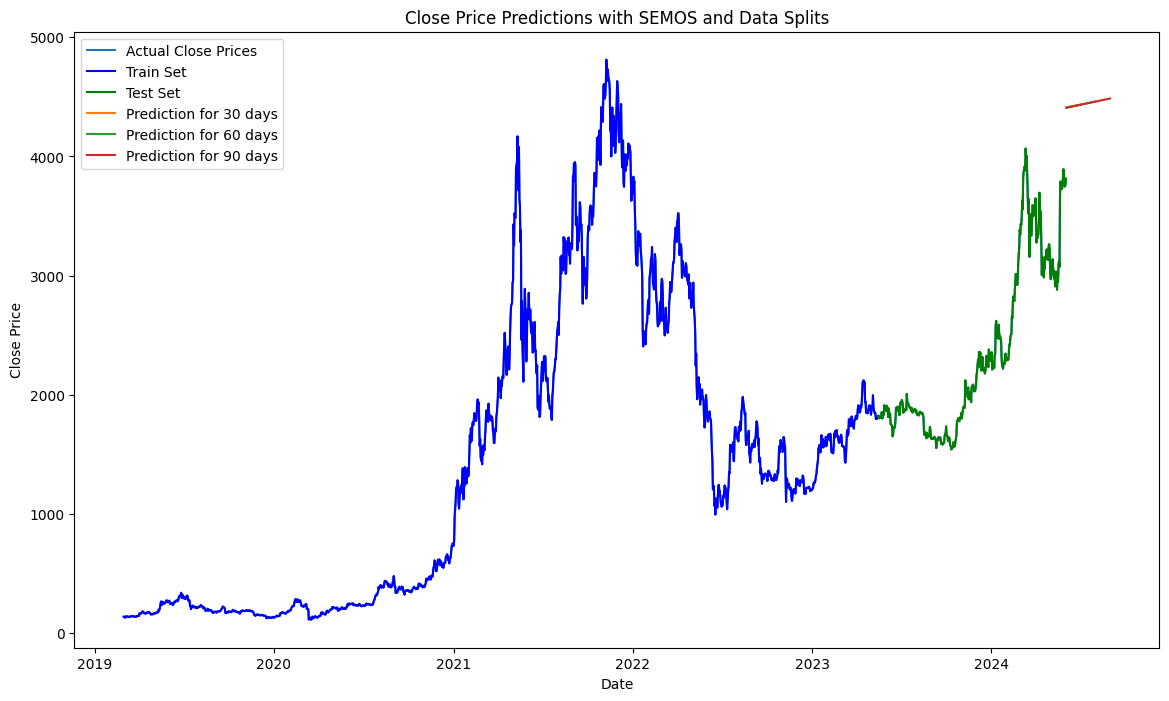

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Eth.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#7:3

MAE: 1756.5824041610422
RMSE: 1849.422684529139
MAPE: 1.0076747637706156
Predictions for the next 30 days: [4082.77780623 4083.34937725 4084.20673377 4085.06409029 4085.92144682
 4086.77880334 4087.63615986 4088.49351639 4089.35087291 4090.20822943
 4091.06558596 4091.92294248 4092.78029901 4093.63765553 4094.49501205
 4095.35236858 4096.2097251  4097.06708162 4097.92443815 4098.78179467
 4099.63915119 4100.49650772 4101.35386424 4102.21122076 4103.06857729
 4103.92593381 4104.78329034 4105.64064686 4106.49800338 4107.0695744 ]
Predictions for the next 60 days: [4082.77780623 4083.34937725 4084.20673377 4085.06409029 4085.92144682
 4086.77880334 4087.63615986 4088.49351639 4089.35087291 4090.20822943
 4091.06558596 4091.92294248 4092.78029901 4093.63765553 4094.49501205
 4095.35236858 4096.2097251  4097.06708162 4097.92443815 4098.78179467
 4099.63915119 4100.49650772 4101.35386424 4102.21122076 4103.06857729
 4103.92593381 4104.78329034 4105.64064686 4106.49800338 4107.35535991
 4108.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

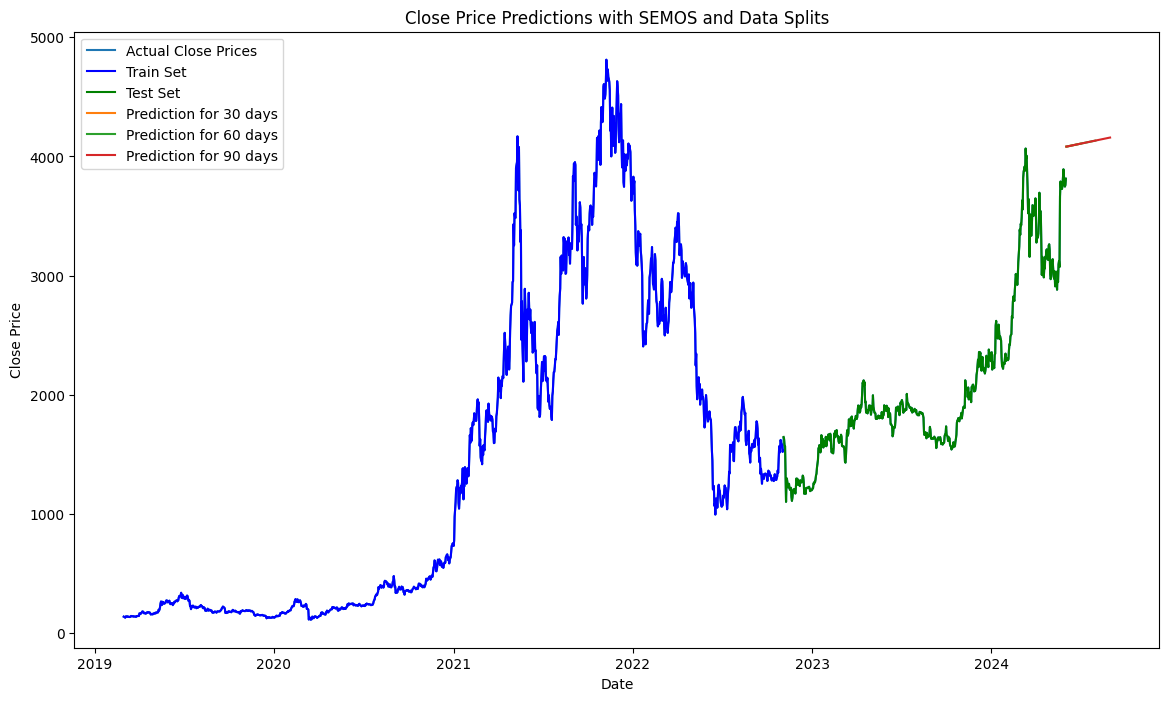

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Eth.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 7:3 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()


#6:4

MAE: 4900.7419139276
RMSE: 4924.735667037233
MAPE: 2.803631216687158
Predictions for the next 30 days: [7520.93618661 7522.07553579 7523.78455955 7525.49358332 7527.20260708
 7528.91163085 7530.62065461 7532.32967838 7534.03870214 7535.74772591
 7537.45674967 7539.16577344 7540.87479721 7542.58382097 7544.29284474
 7546.0018685  7547.71089227 7549.41991603 7551.1289398  7552.83796356
 7554.54698733 7556.25601109 7557.96503486 7559.67405862 7561.38308239
 7563.09210615 7564.80112992 7566.51015369 7568.21917745 7569.35852663]
Predictions for the next 60 days: [7520.93618661 7522.07553579 7523.78455955 7525.49358332 7527.20260708
 7528.91163085 7530.62065461 7532.32967838 7534.03870214 7535.74772591
 7537.45674967 7539.16577344 7540.87479721 7542.58382097 7544.29284474
 7546.0018685  7547.71089227 7549.41991603 7551.1289398  7552.83796356
 7554.54698733 7556.25601109 7557.96503486 7559.67405862 7561.38308239
 7563.09210615 7564.80112992 7566.51015369 7568.21917745 7569.92820122
 7571.6372

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h

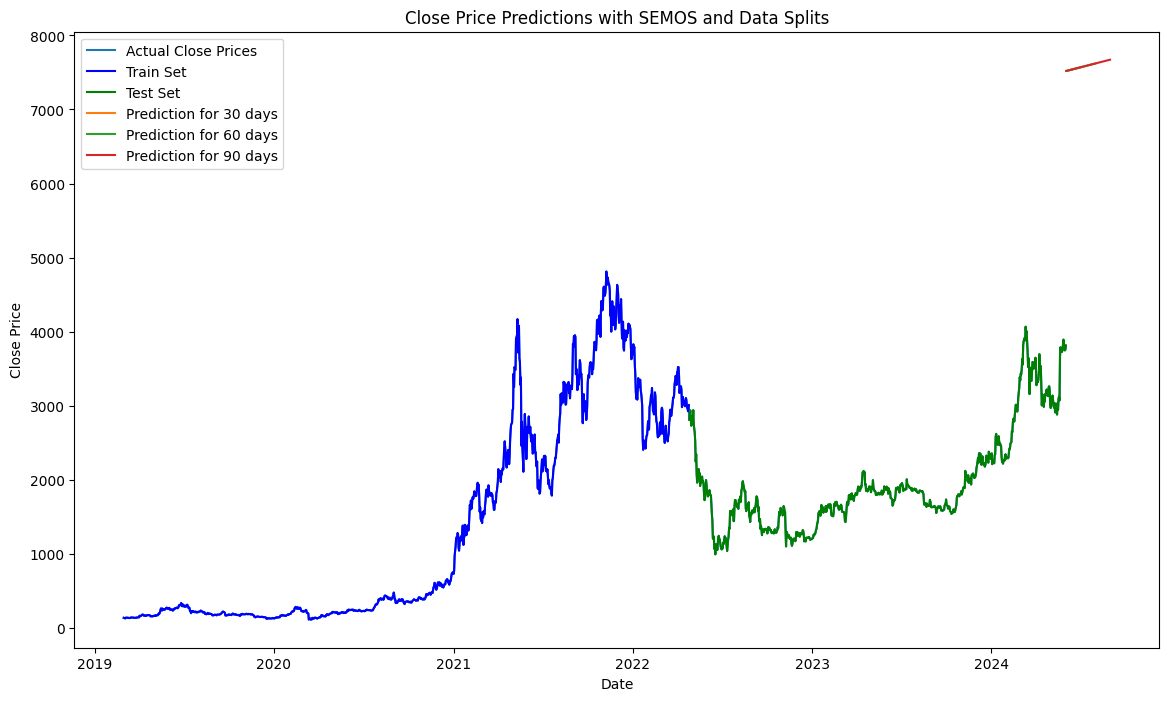

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load the CSV file
file_path = '/content/Eth.csv'
data = pd.read_csv(file_path)

# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Day' as the number of days since the start date
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare features and target
X = data[['Day']]
y = data['Close']

# Split data into train and test sets with 6:4 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Make predictions
predictions = {model_name: model.predict(X_test) for model_name, model in models.items()}

# Calculate weights based on test set performance
def calculate_weights(models, X_test, y_test):
    errors = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        errors[model_name] = np.mean(np.abs((y_test - y_pred) / y_test))
    total_error = sum(errors.values())
    weights = {model_name: (1 - error / total_error) for model_name, error in errors.items()}
    return weights

weights = calculate_weights(models, X_test, y_test)

# Calculate weighted average predictions
combined_predictions = np.zeros(len(X_test))
for model_name, prediction in predictions.items():
    combined_predictions += weights[model_name] * prediction

# Apply smoothing to the combined predictions
combined_predictions_smoothed = uniform_filter1d(combined_predictions, size=3)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, combined_predictions_smoothed)
mse = mean_squared_error(y_test, combined_predictions_smoothed)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - combined_predictions_smoothed) / y_test))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Predict the future 'Close' prices for 30, 60, and 90 days
future_days = [30, 60, 90]
future_predictions = {}

last_day = X['Day'].max()
for days in future_days:
    future_X = np.array([last_day + i for i in range(1, days + 1)]).reshape(-1, 1)
    future_combined_predictions = np.zeros(len(future_X))
    for model_name, model in models.items():
        future_combined_predictions += weights[model_name] * model.predict(future_X)
    future_combined_predictions_smoothed = uniform_filter1d(future_combined_predictions, size=3)
    future_predictions[days] = future_combined_predictions_smoothed

# Print daily predictions for 30, 60, and 90 days
for days, prediction in future_predictions.items():
    print(f"Predictions for the next {days} days: {prediction}")

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], y, label='Actual Close Prices')

# Plot train and test sets
plt.plot(data['Date'][:len(X_train)], y_train, label='Train Set', color='blue')
plt.plot(data['Date'][len(X_train):], y_test, label='Test Set', color='green')

# Plot future predictions
for days, prediction in future_predictions.items():
    future_dates = [data['Date'].max() + pd.Timedelta(days=i) for i in range(1, days + 1)]
    plt.plot(future_dates, prediction, label=f'Prediction for {days} days')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions with SEMOS and Data Splits')
plt.legend()
plt.show()
